# ASSIGNMENT 3
# REDDIT AND WORD CLOUDS

### PRAW PACKAGE AND AUTHENTICATION

In [3]:
# Importing praw package
# Using id and secret from reddit app


import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="sbHLFiorA3Gpufvb-MhHEw",
    client_secret="OLCBrNddm9LH5HCLfyKuEf6uPbtCtg",
    user_agent=user_agent
)

### IMPORTING PACKAGES

In [4]:
# Importing pandas , numpy and regex modules

import pandas as pd
import numpy as np
import re 

### SELECT TRENDING TOPIC FROM REDDIT 

The **"STOCK"** subreddit channel will be use for this project

In [5]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("stocks").hot(limit=None):
    print(submission.title)                                        # Subreddit Title
    print(submission.id)                                           # ID
    print(submission.author)                                       # Author of the subreddit
    print(submission.created_utc)                                  # Date and time being created
    print(submission.score)                                        # Average Score
    print(submission.upvote_ratio)                                 # Upvote ratio
    print(submission.url)                                          # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Rate My Portfolio - r/Stocks Quarterly Thread December 2023
18888ww
AutoModerator
1701424824.0
79
0.99
https://www.reddit.com/r/stocks/comments/18888ww/rate_my_portfolio_rstocks_quarterly_thread/
0


### GET TOTAL COMMENT IN SUBREDDIT

In [40]:
# Top posts from the "STOCK" subreddit using PRAW

headlines = set()
for submission in reddit.subreddit("stocks").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

213


### SCRAPPED DATA

In [7]:
# Create a dataframe from the scrapped data 

stocks_df = pd.DataFrame(headlines)
stocks_df.head()

,0
0,Advanced Micro Devices (AMD) $171 A good long ...
1,PARAP to PARA mandatory conversion
2,When do you guys cut losses on a stock?
3,Estée Lauder stock soars toward best day in 13...
4,Q2 Earnings - Microsoft beats estimates as Azu...


### RETRIEVING COLUMN TITLES

In [8]:
# Gives the column names

stocks_df.columns

RangeIndex(start=0, stop=1, step=1)

### RENAMING COLUMNS

In [9]:
# Renaming the column to titles

stocks_df.columns = ['Titles']

### USING HEAD METHOD

In [10]:
# Gives first five columns in the dataframe

stocks_df.head()

,Titles
0,Advanced Micro Devices (AMD) $171 A good long ...
1,PARAP to PARA mandatory conversion
2,When do you guys cut losses on a stock?
3,Estée Lauder stock soars toward best day in 13...
4,Q2 Earnings - Microsoft beats estimates as Azu...


### COUNT OF  DUPLICATE VALUES

In [11]:
# Counts the number of duplicate values in the 'Titles' column

stocks_df.Titles.duplicated().sum() 

0

### TWITTER DATA PREPROCESSING FOR STOCK ANALYSIS

In [12]:
# Clean the text

# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

# Cleaning the text
stocks_df["Titles"]= stocks_df["Titles"].apply(cleanTxt)

# Show the clean text
stocks_df.head()

,Titles
0,Advanced Micro Devices (AMD) $171 A good long ...
1,PARAP to PARA mandatory conversion
2,When do you guys cut losses on a stock?
3,Estée Lauder stock soars toward best day in 13...
4,Q2 Earnings - Microsoft beats estimates as Azu...


### REMOVING EMOJI'S AND UNICODE FROM REDDIT DATA FOR ENHANCED ANALYSIS

In [13]:
# Removing emoji & Unicode from the reddit data.

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Cleaning the text
stocks_df["Titles"]= stocks_df["Titles"].apply(remove_emoji)

# Show the clean text
stocks_df.head()

,Titles
0,Advanced Micro Devices (AMD) $171 A good long ...
1,PARAP to PARA mandatory conversion
2,When do you guys cut losses on a stock?
3,Estée Lauder stock soars toward best day in 13...
4,Q2 Earnings - Microsoft beats estimates as Azu...


### TEXT ANALYSIS AND VISUALISATION FOR TEXTBLOB AND WORDCLOUD

In [14]:
# Importing modules

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

### SENTIMENT ANALYSIS: SUBJECTIVITY AND POLARITY OF STOCK RELATED TEXT

In [15]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Now we create a new column for what we just did and add it to the Tweet_df dataframe
stocks_df['Subjectivity'] = stocks_df['Titles'].apply(getSubjectivity)
stocks_df['Polarity'] = stocks_df['Titles'].apply(getPolarity)

# Now display data
stocks_df.head()

,Titles,Subjectivity,Polarity
0,Advanced Micro Devices (AMD) $171 A good long ...,0.533333,0.35
1,PARAP to PARA mandatory conversion,0.000000,0.00
2,When do you guys cut losses on a stock?,0.000000,0.00
3,Estée Lauder stock soars toward best day in 13...,0.300000,1.00
4,Q2 Earnings - Microsoft beats estimates as Azu...,0.400000,-0.10


### CATEGORIZING BITCOIN SENTIMENT

In [16]:
# Group the range of Polarity to different categories

def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
     
stocks_df["Insight"] = stocks_df["Polarity"].apply(getInsight)     # to derive insights from polarity values   

stocks_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Advanced Micro Devices (AMD) $171 A good long ...,0.533333,0.350000,Positive
1,PARAP to PARA mandatory conversion,0.000000,0.000000,Neutral
2,When do you guys cut losses on a stock?,0.000000,0.000000,Neutral
3,Estée Lauder stock soars toward best day in 13...,0.300000,1.000000,Positive
4,Q2 Earnings - Microsoft beats estimates as Azu...,0.400000,-0.100000,Negative
5,"Disney beats earnings estimates, hikes guidanc...",0.000000,0.000000,Neutral
6,What do you guys think about stock acquisitions?,0.000000,0.000000,Neutral
7,Feel like I missed out on the bottom,0.000000,0.000000,Neutral
8,What company will be a household name in the n...,0.000000,0.000000,Neutral
9,"U.S. economy added 353,000 jobs in January, mu...",0.450000,0.200000,Positive


### DATA VISUALIZATION

In [17]:
# Create visualizations using Seaborn, WordCloud, and Matplotlib with a specific visual style

import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### VISUALIZING STOCK SENTIMENT DISTRIBUTION

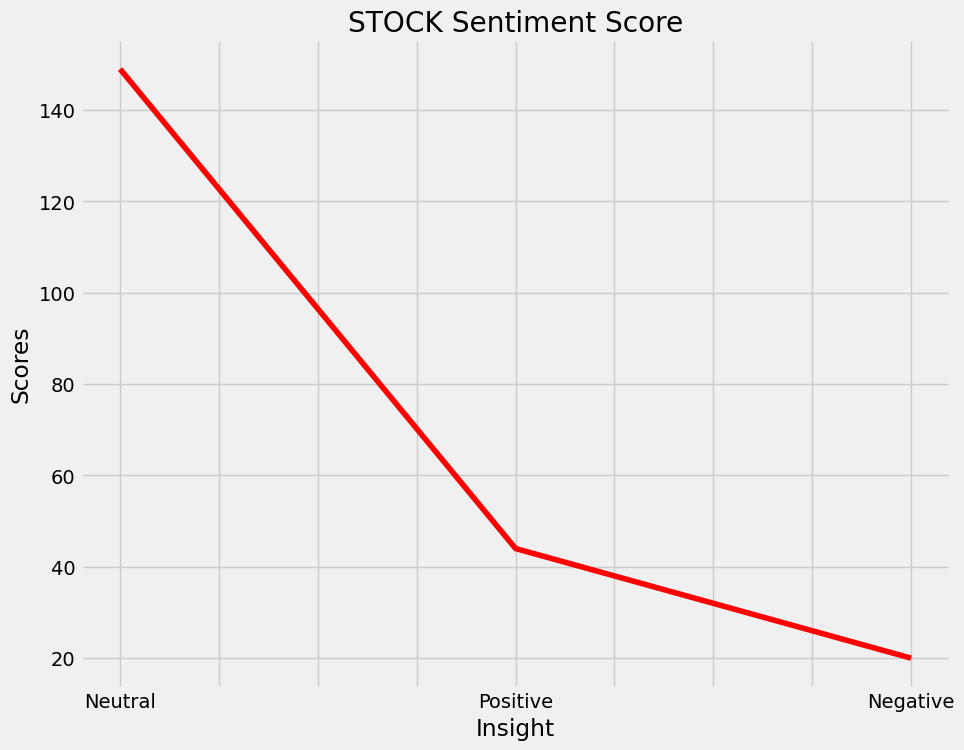

In [39]:
# Plot the values count of sentiment

plt.title("STOCK Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
stocks_df["Insight"].value_counts().plot(kind="line", color="red")
plt.show()

### WORDCLOUD FOR STOCK

A word cloud is a data visualization technique that represents text data in which the size of each word indicates its frequency or importance. It provides a quick and intuitive way to understand the prominent themes or topics 

### WORDCLOUD EXAMPLE 1

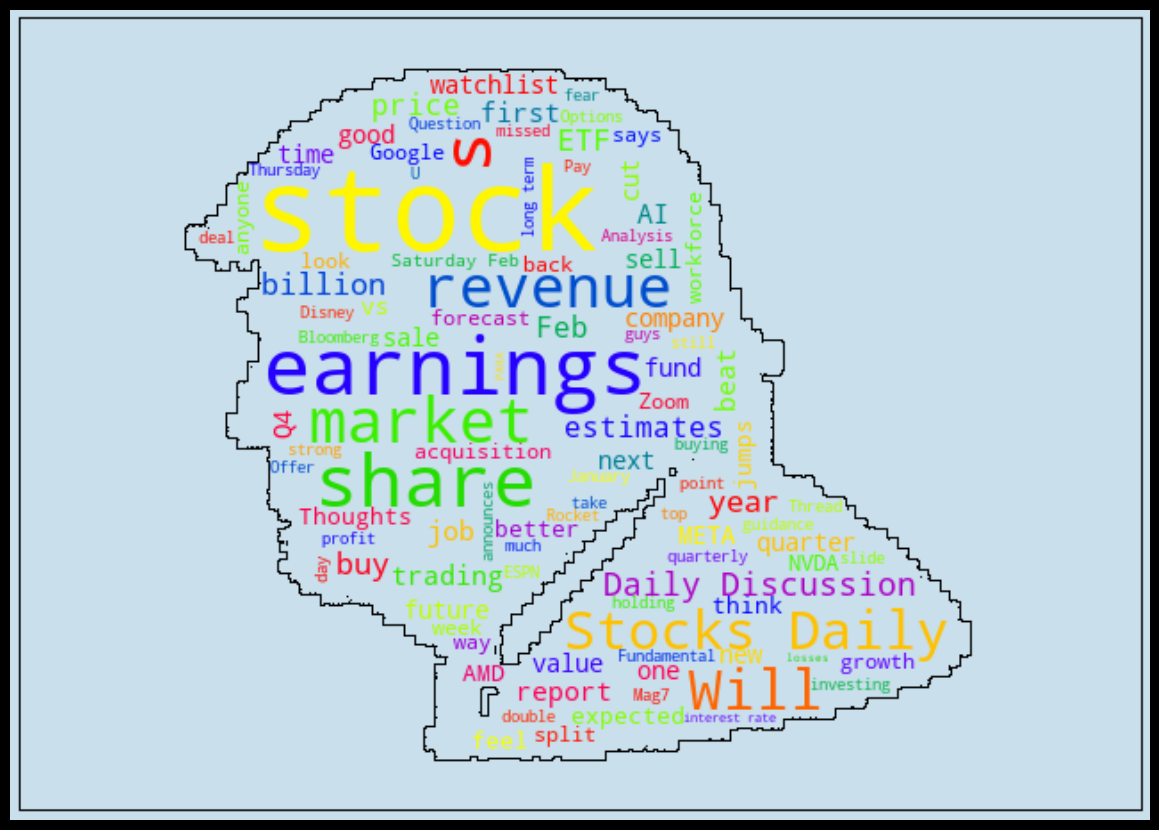

In [21]:
# importing np and pil for image opening and usage.

import numpy as np
from PIL import Image

text = ' '.join([twts for twts in stocks_df['Titles']])

mask1 = np.array(Image.open('trumpmask1.webp'))
wordcloud = WordCloud(width=1000, 
                      height = 600,
                      max_words = 100,
                      stopwords = STOPWORDS,
                      mask = mask1,                                      # mask for cloud shape i.e. image
                      colormap = 'prism',                                # colormap for various font colors
                      contour_width = 0.1,                               # contour_width 
                      background_color="#C9DFEC").generate(text)


plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

### WORDCLOUD EXAMPLE 2

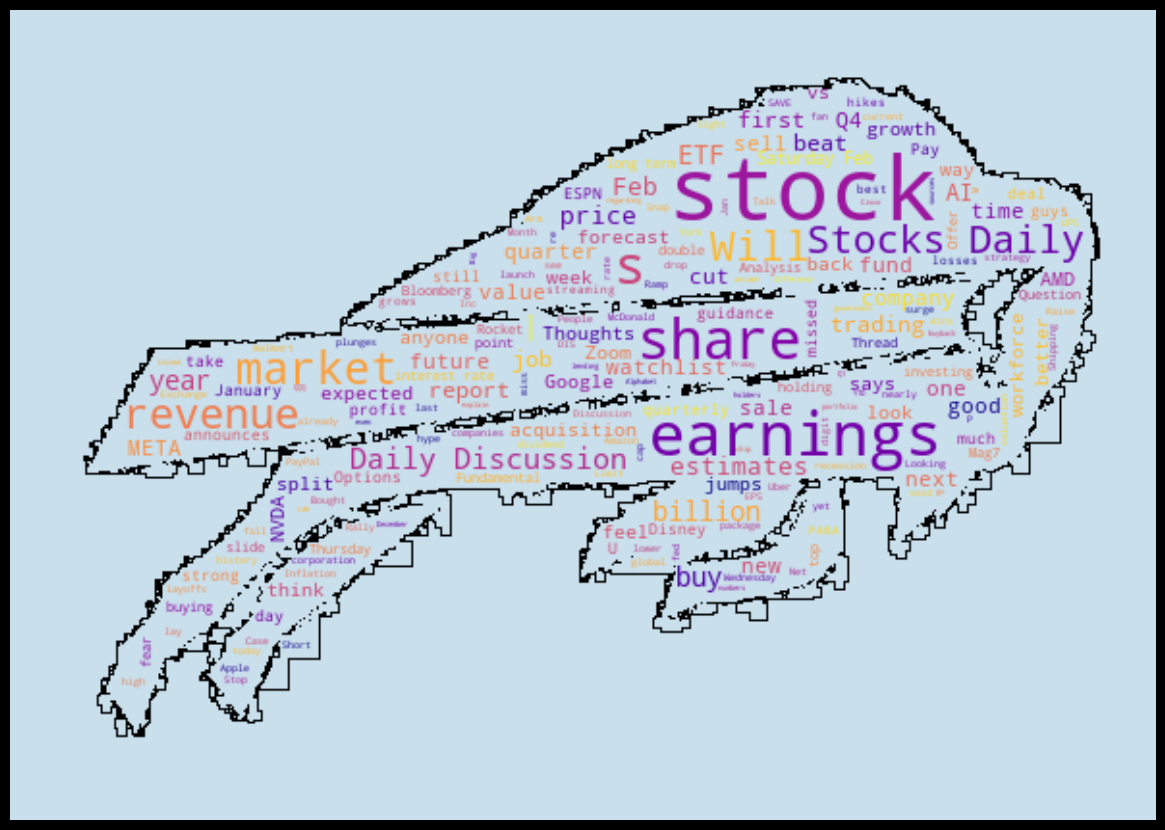

In [27]:
# wordcloud example with different image and bg color

import numpy as np
from PIL import Image
from PIL import ImageDraw

mask = np.array(Image.open('bull.webp'))
wordcloud = WordCloud(width=1000, 
                      height = 600,
                      max_words = 200,
                      stopwords = STOPWORDS,
                      mask = mask,                                       # mask for cloud shape i.e. image
                      contour_width = 1,                                 # contour_width for outline
                      colormap = 'plasma',                               # colormap for various font colors
                      background_color = "#C9DFEC",).generate(text)      # bg color with hash code


plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

### WORDCLOUD EXAMPLE 3

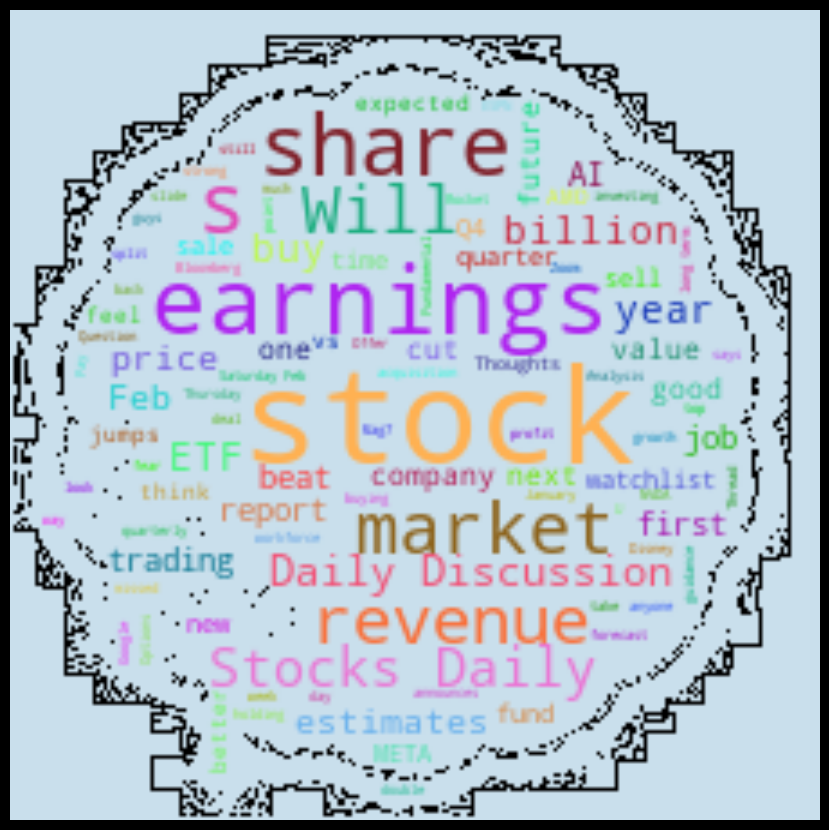

In [28]:
# This is the third example for wordcloud

import numpy as np
from PIL import Image
from PIL import ImageDraw

mask = np.array(Image.open('overlay.jpeg'))

def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    import random
    h = random.randint(0, 360)                    # colour function for random text
    s = random.randint(60, 100)                 
    l = random.randint(30, 70)                   
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(width=1000, 
                      height = 600,
                      max_words = 300,
                      stopwords = STOPWORDS,
                      mask = mask,                # mask for cloud shape i.e. image
                      contour_width = 0.01,       # contour width for outline of word cloud
                      background_color = "#C9DFEC").generate(text)     # bg color with hash code

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

### WORDCLOUD EXAMPLE 4

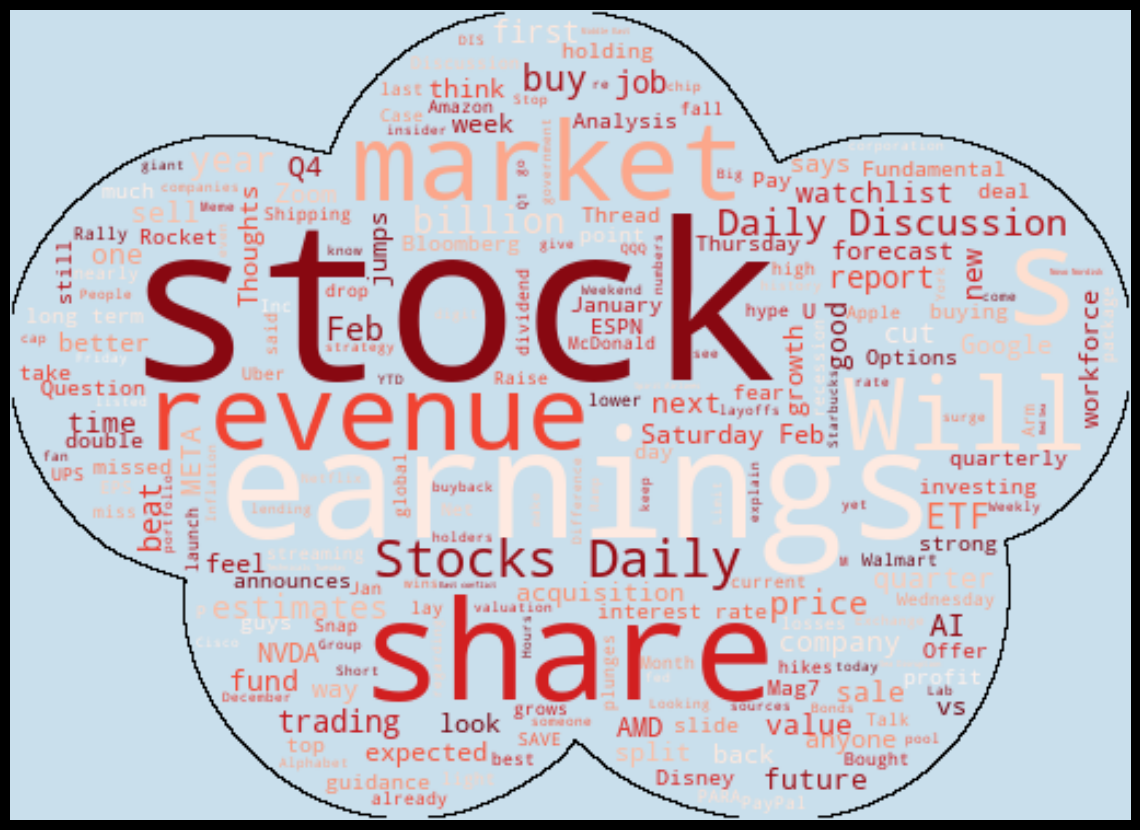

In [33]:
# This is the fourth example for wordcloud
# to show how lines in image could change the cloud pattern

import numpy as np
from PIL import Image

mask = np.array(Image.open('cloud.png'))
wordcloud = WordCloud(width=1000, 
                      height = 600,
                      max_words = 300,
                      stopwords = STOPWORDS,
                      mask = mask,
                      colormap = 'Reds',                              # Reds colormap for font color
                      contour_width = 0.01,                           # contour width for outline
                      background_color = "#C9DFEC").generate(text)

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

### WORDCLOUD EXAMPLE 5

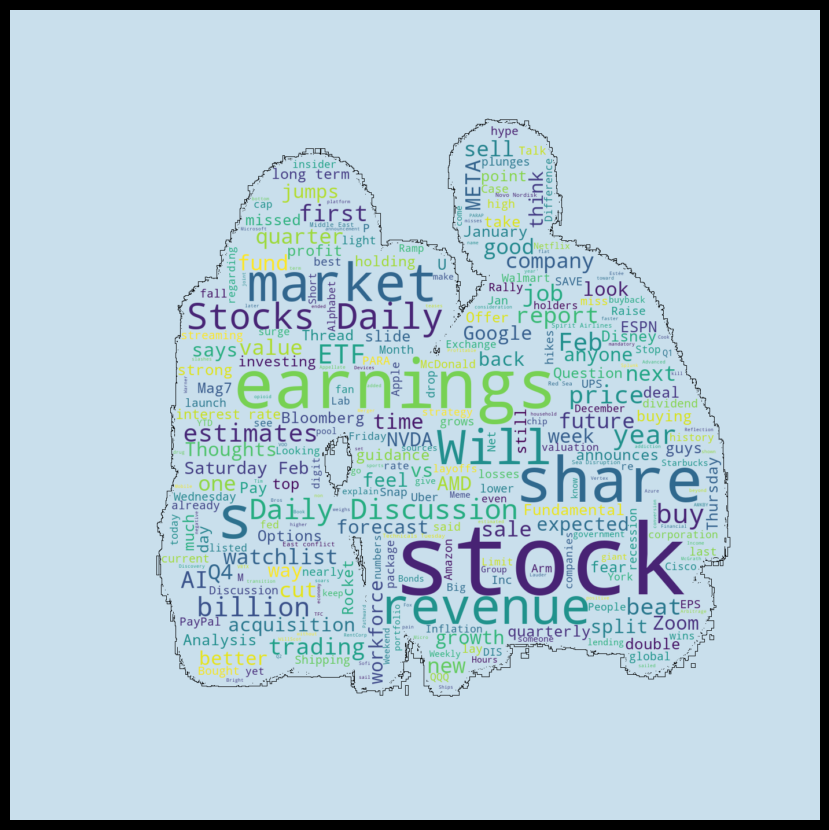

In [35]:
# Example 5 - Worcloud

import numpy as np
from PIL import Image                           # Using pillow for Image Opening

mask = np.array(Image.open('fam.webp'))
wordcloud = WordCloud(width=1000, 
                      height = 600,
                      max_words = 300,
                      stopwords = STOPWORDS,
                      mask = mask,
                      contour_width = 0.03,
                      background_color = "#C9DFEC").generate(text)

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");